In [55]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re
import warnings
import os
warnings.filterwarnings('ignore')

## as we don't have individual masks for all subjects
## use time course of individual masks to replace those with common mask if they exists
## conn does not have data for NTS group so we just do HTHC and TEHC:

# seed time course for seed ROI with individual mask:
input_dir_ind = "data_fmri_time_course_conn_indmask/"

# read fc time course for seed and target ROI with common mask:
input_dir = "data_fmri_time_course_conn_common_mask/"

output_dir = "out03_functional_connectivity_conn_indmask/"

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

files_seed_ind = natsorted(
    glob.glob(input_dir_ind + "time_course_ind_????.txt") 
)

files_seed = natsorted(
    glob.glob(input_dir + "time_course_??HC*.txt") 
)

files_target = natsorted(
    glob.glob(input_dir + "time_course_target_??HC*.txt") 
)

# get files with common subject id:
subject_id = \
    set([int(x[-8:-4]) for x in files_seed]
).intersection(
    set([int(x[-8:-4]) for x in files_seed_ind])
).intersection(
    set([int(x[-8:-4]) for x in files_target])
)

files_seed_ind = [x for x in files_seed_ind if int(x[-8:-4]) in subject_id]
files_seed = [x for x in files_seed if int(x[-8:-4]) in subject_id]
files_target = [x for x in files_target if int(x[-8:-4]) in subject_id]

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'files_seed_ind': files_seed_ind,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    'group': [re.findall("NTHC|TEHC", x)[0] for x in files_seed],
    #'group': ['HC' if int(x[-8:-4]) < 3000 else 'MDD' for x in files_seed],
})


seed_list = ['L_aMFG_10mm',  'L_aMFG_14mm', 
                 'L_aMFG_6mm',  'L_pMFG_10mm',  
                 'L_pMFG_14mm', 'L_pMFG_6mm',  'R_aMFG_10mm', 
                 'R_aMFG_14mm', 'R_aMFG_6mm',  'R_FEF_10mm',  
                 'R_FEF_14mm', 'R_FEF_6mm', 
                 'R_IFJ_10mm', 'R_IFJ_14mm', 
                 'R_IFJ_6mm', 'R_IPL_10mm', 'R_IPL_14mm', 'R_IPL_6mm', 
                 'R_M1_10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10mm',
                 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10mm',
                 'R_preSMA_14mm', 'R_preSMA_6mm']

# df1 = pd.read_csv(files_seed[0], sep = '\t')
# df1.pop(df1.columns[-1])
# seed_list = list(df1.columns)
# seed_list = ['_'.join(x.split('_')[1:]) for x in seed_list]

print(seed_list)

df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
target_list = list(df2.columns)
target_list = ['_'.join(x.split('_')[1:]) for x in target_list]
target_list = [x.replace('.nii', '') for x in target_list]
print(target_list)


# add Left and right Fp to seedlist (common seed ROI does not have Fp): 
# seed_list = ['L_Fp_6mm', 'R_Fp_6mm', 'L_Fp_10mm', 'R_Fp_10mm', 'L_Fp_14mm', 'R_Fp_14mm'] + seed_list
seed_list = ['L_FP_6mm', 'R_FP_6mm', 'L_FP_10mm', 'R_FP_10mm', 'L_FP_14mm', 'R_FP_14mm'] + seed_list

# calculate pearson correlation between seed and target regions:
for seed in seed_list:    
    for target in target_list:
        col_label = seed + '*' + target
        df_connectivity[col_label] = np.nan
    

# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out02_img_file_info_nts_tms_response.csv')

df_hc = pd.read_csv('out02_img_file_info_hc_tms_response.csv')
# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
# df_hc = pd.read_csv('out02_img_file_info_tms_response_zscore_gm.3.csv')

subject_selected = list(df_hc['subject_id'].unique()) + list(df_life_time_mdd['subject_id'])
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity


['L_aMFG_10mm', 'L_aMFG_14mm', 'L_aMFG_6mm', 'L_pMFG_10mm', 'L_pMFG_14mm', 'L_pMFG_6mm', 'R_aMFG_10mm', 'R_aMFG_14mm', 'R_aMFG_6mm', 'R_FEF_10mm', 'R_FEF_14mm', 'R_FEF_6mm', 'R_IFJ_10mm', 'R_IFJ_14mm', 'R_IFJ_6mm', 'R_IPL_10mm', 'R_IPL_14mm', 'R_IPL_6mm', 'R_M1_10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10mm', 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10mm', 'R_preSMA_14mm', 'R_preSMA_6mm']
['dACC_10mm', 'dACC_6mm', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 'l-dACC_MNI152_2mm', 'r-dACC_MNI152_2mm', 'sgACC_6_16_-10_10mm']


In [56]:
df_connectivity.head()

,files_seed,files_target,files_seed_ind,subject_id,group,L_FP_6mm*dACC_10mm,L_FP_6mm*dACC_6mm,L_FP_6mm*FIRST_B_amyg_small,L_FP_6mm*FIRST_L_amyg_small,L_FP_6mm*FIRST_R_amyg_small,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1003,NTHC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1009,NTHC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1015,NTHC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1016,NTHC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1019,NTHC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# delete empty files in the input folder: input_dir_ind to run this chunck:
col1_selected = ['L_aMFG_10mm',  'L_aMFG_14mm', 
                 'L_aMFG_6mm',  'L_pMFG_10mm',  
                 'L_pMFG_14mm', 'L_pMFG_6mm',  'R_aMFG_10mm', 
                 'R_aMFG_14mm', 'R_aMFG_6mm',  'R_FEF_10mm',  
                 'R_FEF_14mm', 'R_FEF_6mm', 
                 'R_IFJ_10mm', 'R_IFJ_14mm', 
                 'R_IFJ_6mm', 'R_IPL_10mm', 'R_IPL_14mm', 'R_IPL_6mm', 
                 'R_M1_10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10mm',
                 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10mm',
                 'R_preSMA_14mm', 'R_preSMA_6mm']

for i in tqdm(range(len(df_connectivity.index))):
    
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
    col_list = list(df1.columns)
    df1.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    df1 = df1[col1_selected]
    
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
    col_list = list(df2.columns)
    col_list = ['_'.join(x.split('_')[1:]) for x in col_list]
    col_list = [x.replace('.nii', '') for x in col_list]
    df2.columns = col_list
    
    #print(df_connectivity.iloc[i, 2])
    df3 = pd.read_csv(df_connectivity.iloc[i, 2], sep = '\t')
    df3.pop(df3.columns[-1])
    col_list = list(df3.columns)
    col_list = ['_'.join(x.split('_')[1:]) for x in col_list]
    # fix the mismatch of column names of individual seed:
    col_list = [x.replace('-', '_', 1) for x in col_list]
    df3.columns = col_list
    
    
    corr = []
    
    for seed_target in list(df_connectivity.columns)[5:]:
        seed = seed_target.split('*')[0]
        target = seed_target.split('*')[1]

        if seed in df3 and all(df3[seed].values != 0):
            corr.append(np.corrcoef(df3[seed].values, df2[target].values)[0][1])
        elif seed in df1:
            corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
        else:
            corr.append(np.nan)
        
    df_connectivity.iloc[i, 5:] = corr
    
#     break
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity.csv', index = None)


100%|███████████████████████████████████████████| 72/72 [00:05<00:00, 12.72it/s]


In [58]:
df_connectivity

,files_seed,files_target,files_seed_ind,subject_id,group,L_FP_6mm*dACC_10mm,L_FP_6mm*dACC_6mm,L_FP_6mm*FIRST_B_amyg_small,L_FP_6mm*FIRST_L_amyg_small,L_FP_6mm*FIRST_R_amyg_small,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1003,NTHC,0.152435,0.122085,0.295696,0.341298,0.214226,...,0.300211,-0.268232,0.097649,0.083379,0.152144,0.080677,0.174734,0.405796,0.302960,-0.204967
1,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1009,NTHC,NaN,NaN,NaN,NaN,NaN,...,0.077380,-0.162466,-0.429917,-0.386728,0.092395,0.160955,0.019134,-0.238393,-0.203110,-0.123607
2,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1015,NTHC,NaN,NaN,NaN,NaN,NaN,...,0.635341,-0.252900,0.337038,0.360153,-0.170539,-0.195101,-0.140427,0.340822,0.406339,-0.328100
3,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1016,NTHC,NaN,NaN,NaN,NaN,NaN,...,0.399660,0.222681,-0.013134,-0.125039,-0.007310,0.071281,-0.086466,0.548174,0.447111,0.206755
4,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,1019,NTHC,NaN,NaN,NaN,NaN,NaN,...,0.283614,-0.116286,0.181286,0.203791,-0.033146,-0.055298,-0.014000,0.269150,0.295436,0.067940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,2102,TEHC,0.044612,0.027679,0.052242,0.088756,0.020189,...,0.008116,0.071692,-0.097512,-0.068439,0.021834,-0.004571,0.040328,-0.026942,0.025302,0.023742
68,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,2103,TEHC,-0.292651,-0.313870,-0.117252,-0.043425,-0.106987,...,0.459548,0.137200,0.282565,0.287686,-0.116183,-0.101638,-0.089206,0.429488,0.482183,0.191901
69,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,2104,TEHC,-0.405967,-0.398091,-0.221612,-0.183986,-0.202982,...,0.564389,-0.102970,0.243973,0.228854,0.035503,0.024816,0.036839,0.332416,0.406966,-0.105143
70,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask/time_course...,2105,TEHC,-0.196030,-0.186016,0.005234,-0.233392,0.169687,...,0.323037,-0.034885,-0.084545,-0.070605,0.122513,-0.023821,0.197644,-0.183530,-0.156672,0.078500


In [59]:
# fisher z transform FC (pearson's correlation)

# import re
import pandas as pd

df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

fc_cols = [x for x in df_connectivity.columns if re.search('-', x)]
for col in fc_cols:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)
    

df_connectivity.drop(columns = ['files_seed', 'files_target', 'files_seed_ind'], inplace = True)
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity_z.csv', index = None)
df_connectivity.describe()


,subject_id,L_FP_6mm*dACC_10mm,L_FP_6mm*dACC_6mm,L_FP_6mm*FIRST_B_amyg_small,L_FP_6mm*FIRST_L_amyg_small,L_FP_6mm*FIRST_R_amyg_small,L_FP_6mm*l-dACC_MNI152_2mm,L_FP_6mm*r-dACC_MNI152_2mm,L_FP_6mm*sgACC_6_16_-10_10mm,R_FP_6mm*dACC_10mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
count,72.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,50.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1497.166667,0.081998,0.066014,-0.040974,-0.040272,-0.036954,0.021769,0.022360,0.075296,0.128229,...,0.342929,-0.069895,0.038708,0.042134,0.045709,0.042763,0.039703,0.240858,0.283714,-0.066981
std,503.210034,0.231947,0.226462,0.184156,0.196123,0.170553,0.218717,0.223711,0.198688,0.243359,...,0.223650,0.183273,0.204263,0.199003,0.168268,0.173794,0.169773,0.212305,0.211816,0.195935
min,1003.000000,-0.405967,-0.398091,-0.475204,-0.440184,-0.505893,-0.462672,-0.494348,-0.484116,-0.337364,...,-0.209077,-0.458686,-0.430540,-0.424534,-0.379749,-0.362710,-0.341672,-0.376889,-0.220996,-0.525049
25%,1042.250000,-0.067979,-0.099530,-0.177879,-0.178871,-0.134375,-0.121811,-0.108048,-0.023098,-0.044110,...,0.192589,-0.198880,-0.095735,-0.091761,-0.046622,-0.101984,-0.050649,0.154753,0.166656,-0.179107
50%,1101.500000,0.088339,0.057018,-0.024858,-0.043425,-0.019414,0.019249,0.044976,0.081033,0.079835,...,0.339281,-0.078641,0.045019,0.052516,0.060597,0.054758,0.041023,0.259955,0.325393,-0.076834
75%,2044.750000,0.233508,0.196880,0.086146,0.110660,0.081932,0.162078,0.174404,0.201085,0.305207,...,0.522934,0.062159,0.160787,0.188022,0.149684,0.161511,0.168108,0.388080,0.431406,0.068571
max,2108.000000,0.559532,0.524269,0.295696,0.341298,0.286010,0.565509,0.419661,0.648608,0.656376,...,0.750321,0.385090,0.523762,0.484768,0.388015,0.434278,0.427080,0.615767,0.710983,0.464163


In [81]:
df_connectivity['subject_id'].groupby(df_connectivity['group']).count()

group
NTHC    40
TEHC    32
Name: subject_id, dtype: int64

In [72]:
# ttest:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv')
# df_connectivity_long = pd.wide_to_long(df_connectivity, target_list, i="id", j="year")

from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import numpy as np

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.001)] = '<.001***'
        
    return report2

# ['dACC_10mm', 'dACC_6mm', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 
#  'l-dACC_2mm_mask', 'r-dACC_2mm_mask', 'sgACC_6_16_-10_10mm']

target_list = ['dACC_10mm', 'dACC_6mm', 'sgACC_6_16_-10_10mm', 
               'l-dACC_MNI152_2mm', 'r-dACC_MNI152_2mm',
               'FIRST_L_amyg_small', 'FIRST_R_amyg_small']
# target_list = ['sgACC_6_16_-10', 'FIRST_B_amyg', 'FIRST_L_amyg', 'FIRST_R_amyg']
mask = '_6mm\*'

test_variables = []
for seed in target_list:
    test_variables += [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]

row_index = pd.MultiIndex.from_tuples([(i , j) for i in target_list for j in ['t value', 'p value', "Cohen's d"]])

col = ['L_FP', 'R_FP', 'L_aMFG','R_aMFG', 'L_pMFG', 'R_pMFG', 'R_IFJ', 'R_FEF', 'R_M1', 'R_preSMA', 'R_IPL']
result = pd.DataFrame(index = row_index, 
#                       columns = list(set([x.split('-')[0] for x in test_variables]),
                     columns = col)

result_hc = result.copy()

# statistical tests for each roi and roi setting:
for var in test_variables:
        
    seed = var.split('*')[1]
    target = var.split('*')[0]
    target = '_'.join(target.split('_')[:2])
    
    # NTHC only:
    hc = df_connectivity.loc[(df_connectivity['group']=='NTHC'), var].values
#     hc = df_connectivity.loc[:, var].values
    
    hc = hc[~np.isnan(hc)]
    
    t, p = ttest_1samp(hc, popmean=0)
    cohend = np.mean(hc) / np.std(hc)
    result_hc.loc[(seed, 't value'), target] = t
    result_hc.loc[(seed, 'p value'), target] = p
    result_hc.loc[(seed, "Cohen's d"), target] = cohend
    

# save results separately for each roi setting:
# for var in test_variables:
#     result.loc[(tms, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_file_prefix + 'response_' + var + '.csv')

# result = format_table(result)
# result.to_csv('out03_ttest' + mask + '.csv')
# result.loc[(seed_list, ['p value', "Cohen's d"]), :]

result_hc = format_table(result_hc)
result_hc.to_csv(output_dir + 'out03_ttest_hc' + mask[:-2] + '.csv')
result_hc.loc[(target_list, ['p value', "Cohen's d"]), :]

# result_hc

L_FP    R_FP    L_aMFG    R_aMFG   L_pMFG  \
dACC_10mm           p value     0.842  0.011*  <.001***  <.001***    0.125   
                    Cohen's d   0.043   0.557     0.684     0.570    0.251   
dACC_6mm            p value     0.800  0.016*  <.001***  <.001***    0.205   
                    Cohen's d  -0.055   0.526     0.757     0.657    0.206   
sgACC_6_16_-10_10mm p value     0.295   0.555     0.947    0.011*    0.546   
                    Cohen's d   0.233   0.122    -0.010    -0.424   -0.097   
l-dACC_MNI152_2mm   p value     0.332   0.767  <.001***  <.001***   0.042*   
                    Cohen's d  -0.216   0.061     0.927     0.650   -0.336   
r-dACC_MNI152_2mm   p value     0.540   0.186  <.001***  <.001***    0.265   
                    Cohen's d  -0.135   0.277     1.023     0.888   -0.181   
FIRST_L_amyg_small  p value     0.903  0.015*     0.473    0.046*    0.063   
                    Cohen's d  -0.026  -0.534    -0.115    -0.329   -0.305   
FIRST_R_amyg_small  p value     0.964  0.025*     0.075    0.029*  0.002**   
                    Cohen's d   0.009  -0.485    -0.291    -0.361   -0.516   

                                R_pMFG   R_IFJ     R_FEF      R_M1  R_preSMA  \
dACC_10mm           p value      0.174   0.441     0.204  <.001***     0.057   
                    Cohen's d    0.221  -0.124    -0.206    -1.051     0.313   
dACC_6mm            p value      0.197   0.471     0.403  <.001***     0.065   
                    Cohen's d    0.209  -0.116    -0.135    -1.077     0.303   
sgACC_6_16_-10_10mm p value      0.562  0.046*  <.001***     0.602    0.040*   
                    Cohen's d   -0.093  -0.328    -0.638     0.084    -0.339   
l-dACC_MNI152_2mm   p value    0.005**   0.471    0.034*  <.001***  <.001***   
                    Cohen's d   -0.471  -0.116    -0.351    -0.576     1.361   
r-dACC_MNI152_2mm   p value     0.016*   0.554     0.302  <.001***  <.001***   
                    Cohen's d   -0.401   0.095    -0.167    -0.762     1.518   
FIRST_L_amyg_small  p value      0.273   0.195   0.001**  <.001***     0.137   
                    Cohen's d   -0.177   0.210    -0.558     0.793     0.242   
FIRST_R_amyg_small  p value      0.177   0.284   0.007**  <.001***     0.210   
                    Cohen's d   -0.219   0.173    -0.450     0.811     0.204   

                                  R_IPL  
dACC_10mm           p value    <.001***  
                    Cohen's d     0.977  
dACC_6mm            p value    <.001***  
                    Cohen's d     0.862  
sgACC_6_16_-10_10mm p value       0.256  
                    Cohen's d     0.184  
l-dACC_MNI152_2mm   p value       0.782  
                    Cohen's d    -0.044  
r-dACC_MNI152_2mm   p value       0.603  
                    Cohen's d     0.083  
FIRST_L_amyg_small  p value    <.001***  
                    Cohen's d    -0.645  
FIRST_R_amyg_small  p value     0.002**  
                    Cohen's d    -0.508

In [73]:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv', )

# add mean response of amygdala (of current resting state data) to dataframe:
# roi_name = ["FIRST_B_amyg_small", "FIRST_L_amyg_small", "FIRST_R_amyg_small"]
# roi_index= [0, 1, 2]

# for idx, name in zip(roi_index, roi_name):
#     mean_response = []
#     for i, f in enumerate(df_connectivity['files_target']):
#         df2 = pd.read_csv(files_target[0], sep = '\t')
#         df2.pop(df2.columns[-1])
#         mean_response.append(df2.iloc[i,:].mean())
        
#     df_connectivity[name] = mean_response

# add tms induced responsed in amygdala (of tms session) to dataframe:


col = [
    "FIRST_R_amyg_small",
    "FIRST_B_amyg_small",
    "FIRST_L_amyg_small",
    "sgACC_6_16_-10_10mm",
    'dACC_10mm', 
    'dACC_6mm',
    'l-dACC_MNI152_2mm', 'r-dACC_MNI152_2mm',
]

### select response data set:
tms_response = pd.read_csv("out02_img_file_info_hc_tms_response.csv")
# tms_response = pd.read_csv('out02_img_file_info_tms_response_zscore_gm.3.csv')

tms_response = tms_response[['subject_id', 'site'] + col]

df_connectivity_merge = df_connectivity.merge(tms_response, on = 'subject_id', how = 'inner')
df_connectivity_merge


,subject_id,group,L_FP_6mm*dACC_10mm,L_FP_6mm*dACC_6mm,L_FP_6mm*FIRST_B_amyg_small,L_FP_6mm*FIRST_L_amyg_small,L_FP_6mm*FIRST_R_amyg_small,L_FP_6mm*l-dACC_MNI152_2mm,L_FP_6mm*r-dACC_MNI152_2mm,L_FP_6mm*sgACC_6_16_-10_10mm,...,R_preSMA_6mm*sgACC_6_16_-10_10mm,site,FIRST_R_amyg_small,FIRST_B_amyg_small,FIRST_L_amyg_small,sgACC_6_16_-10_10mm,dACC_10mm,dACC_6mm,l-dACC_MNI152_2mm,r-dACC_MNI152_2mm
0,1003,NTHC,0.152435,0.122085,0.295696,0.341298,0.214226,-0.077745,0.046955,0.040709,...,-0.207912,L_pMFG,-0.378541,-0.254477,-0.117653,-0.529444,-0.130265,-0.113905,-0.320320,-0.130311
1,1003,NTHC,0.152435,0.122085,0.295696,0.341298,0.214226,-0.077745,0.046955,0.040709,...,-0.207912,L_aMFG,0.482449,0.660211,0.856258,-0.243115,0.040040,0.103379,0.302777,0.113505
2,1003,NTHC,0.152435,0.122085,0.295696,0.341298,0.214226,-0.077745,0.046955,0.040709,...,-0.207912,R_pMFG,-1.986826,-1.988067,-1.989436,0.117211,0.107911,0.202197,0.135965,-0.297241
3,1003,NTHC,0.152435,0.122085,0.295696,0.341298,0.214226,-0.077745,0.046955,0.040709,...,-0.207912,R_aMFG,-1.132146,-1.100250,-1.065073,1.691317,-1.427927,-1.492492,-1.064215,-1.616265
4,1009,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.124243,L_pMFG,-0.509219,-0.410644,-0.301931,0.090254,0.448318,0.631392,0.170637,0.281996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2108,TEHC,0.170619,0.116254,-0.263500,-0.182773,-0.314461,-0.068687,0.044976,0.109723,...,-0.235783,L_pMFG,-0.346448,-0.471950,-0.610360,-0.570895,-2.075246,-2.334414,-1.981871,-1.712880
345,2108,TEHC,0.170619,0.116254,-0.263500,-0.182773,-0.314461,-0.068687,0.044976,0.109723,...,-0.235783,L_aMFG,-0.179835,-0.416241,-0.676962,-1.221966,0.212947,0.241907,-0.098679,-0.229004
346,2108,TEHC,0.170619,0.116254,-0.263500,-0.182773,-0.314461,-0.068687,0.044976,0.109723,...,-0.235783,R_M1,-0.473976,-0.398117,-0.314455,0.066918,-0.521339,-1.125527,0.260226,0.019497
347,2108,TEHC,0.170619,0.116254,-0.263500,-0.182773,-0.314461,-0.068687,0.044976,0.109723,...,-0.235783,R_pMFG,-0.740857,-0.741487,-0.742183,-0.549649,-0.401823,-0.492731,-0.408335,-0.112976


In [76]:
# scatter plot:

from scipy.stats import pearsonr
# we don't need partial correlation this could be eliminated to make the code cleaner
from pingouin import partial_corr
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(4.2 * 9, 4.2 * 3)}, font_scale = 1)
sns.set_style("ticks")

# plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search("FIRST_L_amyg_small", x)]
# colors = [
#     mcolors.CSS4_COLORS['dimgray'], 
#     mcolors.CSS4_COLORS['darkgrey'],
#     mcolors.CSS4_COLORS['darkgrey'],
# ]

colors = [
    '#3D59AB', 
    '#6495ED',
    '#458B00',
]


# colors = sns.color_palette("husl", 5).as_hex()
# colors = [colors[0], colors[2]]

scatter_para = {'alpha': 0.7, 's': 30, 'linewidth': 0.2}

def scatter_plot(plot_data, row_order):
    
    g = sns.lmplot(x           = "connectivity",
                   y           = 'mean_response', 
                   #hue         = 'group', 
                   #hue_order   = ['NTHC', 'NTS'],
                   palette     = colors, 
                   #markers     = ['o', 'v',],
                   hue         = 'seed',
                   row         = 'target', 
                   row_order   = row_order,
                   col         = 'seed', 
                   data        = plot_data, 
                   fit_reg     = True, 
                   facet_kws   = {'sharex': False, 'sharey': True},
                   scatter_kws = scatter_para, 
                   line_kws    = {'lw': 2},
                   x_jitter    = 0, 
                   order       = 1,
                   height      = 3.27, 
                   aspect      = 1, 
                   robust      = False,
                   legend      = False)
    
    # compute R squared for each group and cluster:
    column_title = plot_data['seed'].unique()
    
    # use row_order to make sure label and data match correctly:
    #row_title = sorted(plot_data['target'].unique())
    row_title = row_order 
        
    # add legend last column of each row:
#     for row in range(len(row_title)):
#         ## create custom legend for regplot:
#         hc_line = mlines.Line2D([], [], color=colors[0], marker='o',linewidth=4,
#                           markersize=8, label='HC')
#         dis_line = mlines.Line2D([], [], color=colors[1], marker='v', linewidth=4, #lineStyle = 'dashed',
#                                   markersize=8, label='MDD')

#         g.axes[row, -1].legend(handles=[hc_line, dis_line], 
#                                loc = 'lower right',frameon=False)
#         plt.setp(g.axes[row, -1].get_legend().get_texts(), fontsize='12')
    
#     x_pos = [18, 12, 71, 48, 7, -5]
#     x_lim = [[16, 62], [11.5, 18.5], [69, 102], [46, 85], [6, 25], [-10, 100]]
    
    # add annotation (correlation value) and some adjustments to the axes:
    for col in range(len(column_title)):
        for row in range(len(row_title)):
            
            # HC:
            x = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])
                              , 'mean_response'].values
            
            y = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])
                              , 'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             print(any(idx_nan))
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
            r, p = pearsonr(x, y)
#             label1 = "HC: $r$ = %.3f, $p$ = %.3f" % (r, p)
            label1 = "$r$ = %.3f, $p$ = %.3f" % (r, p)
            if p < .05:
                label1 += '*'
             
            # MDD:
#             x = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'mean_response'].values
            
#             y = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
#             label2 = "MDD: $r$ = %.3f, $p$ = %.3f" % (r, p)
#             if p < .05:
#                 label2 += '*'
                     
    
            g.axes[row, col].set_xlim([-.8, .6])
            xticks = np.arange(-.8, .8, .2)
            g.axes[row, col].set_xticks(xticks)
        
            xlim = g.axes[row, col].get_xlim()
            label_x = xlim[0] + (xlim[1] - xlim[0]) * .1
        
            ylim = g.axes[row, col].get_ylim()
            label_y1 = ylim[1] - (ylim[1] - ylim[0]) * .1
            
            g.axes[row, col].text(label_x, label_y1, label1, fontsize = 13)
#             g.axes[row, col].text(label_x[col], label_y2, label2, fontsize = 13)
        
            # Hide the right and top spines
            g.axes[row, col].spines['right'].set_visible(False)
            g.axes[row, col].spines['top'].set_visible(False)
            
    
    # change x and y label:
    for row in range(len(row_title)): 
        g.axes[row, 0].set(ylabel='TMS induced response')
            
    return g



In [101]:
# correlation between mean response at amygdala and FC with stimulate site:

# roi_name = ["FIRST_B_amyg", "FIRST_L_amyg", "FIRST_R_amyg"]

# roi pattern to search for columns in FC.
roi_name = ["FIRST_L_amyg", "FIRST_R_amyg", "sgACC", "dACC_10", "dACC_6" ,"l-dACC", "r-dACC"]

# col name for tms induced response
roi_col_name = ["FIRST_L_amyg_small", 
                "FIRST_R_amyg_small", 
                "sgACC_6_16_-10_10mm", 
                'dACC_10mm', 
                'dACC_6mm',
                'l-dACC_MNI152_2mm', 'r-dACC_MNI152_2mm',
               ]

mask_size = '_6mm\*'

plot_data_all = []
for roi, roi_col in zip(roi_name, roi_col_name):
    seed_roi = [x for x in df_connectivity_merge.columns if re.search(mask_size, x) and re.search(roi, x)]
#     print(seed_roi)
#     print('---')
    plot_data = []
    for seed in seed_roi:
        plot_data_i = df_connectivity_merge[['subject_id', 'group', 'site', roi_col, seed]]
        plot_data_i.columns = ['subject_id', 'group', 'site', 'mean_response', 'connectivity']
#         print(plot_data_i)
        plot_data.append(plot_data_i)
        
    plot_data = pd.concat(plot_data, axis = 0, keys = seed_roi)
    plot_data_all.append(plot_data)
    
plot_data_all = pd.concat(plot_data_all, axis = 0, keys = roi_name)
plot_data_all.reset_index(level = [0, 1], inplace = True)
plot_data_all.columns.values[:2] = ['seed', 'target']

plot_data_all['seed'].replace({'FIRST_': ''}, regex=True, inplace = True)
plot_data_all['seed'].replace({'_small': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + '.*': ''}, regex=True, inplace = True)

plot_data_all = plot_data_all.loc[plot_data_all['target'] == plot_data_all['site'], :]

## only for NTHC:
plot_data_all = plot_data_all.loc[plot_data_all['group'] == "NTHC", :]

### remove outliers:
m   = plot_data_all['mean_response'].mean()
std = plot_data_all['mean_response'].std()

lower, upper = m - 2.5 * std, m + 3 * std

print(plot_data_all.loc[(plot_data_all['mean_response']<=lower) | 
                        (plot_data_all['mean_response']>=upper), :])
plot_data_all = plot_data_all.loc[(plot_data_all['mean_response']>lower) & 
                                  (plot_data_all['mean_response']<upper), :]


plot_data_all = plot_data_all.loc[plot_data_all['target'].isin(['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']), :]

plot_data_all['target'] = pd.Categorical(
    plot_data_all['target'], categories=['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1'], ordered=True)

# sorted(plot_data_all['target'].unique())
# plot_data_all.head()

plot_data_all.to_csv(output_dir + 'out03_plot_data_tms_induced_response_FC.csv')

        seed  target  subject_id group    site  mean_response  connectivity
125   L_amyg  L_aMFG        1056  NTHC  L_aMFG      -1.833309      0.045865
44    L_amyg  L_pMFG        1027  NTHC  L_pMFG      -2.656261     -0.335736
181   L_amyg  L_pMFG        1105  NTHC  L_pMFG      -1.948128     -0.166116
2     L_amyg  R_pMFG        1003  NTHC  R_pMFG      -1.989436      0.359788
67    L_amyg  R_pMFG        1036  NTHC  R_pMFG      -2.739173      0.045378
44    R_amyg  L_pMFG        1027  NTHC  L_pMFG      -2.572802     -0.273709
190   R_amyg  R_aMFG        1107  NTHC  R_aMFG      -4.443242      0.004776
2     R_amyg  R_pMFG        1003  NTHC  R_pMFG      -1.986826      0.253261
97    R_amyg  R_pMFG        1047  NTHC  R_pMFG      -1.791896     -0.333212
44     sgACC  L_pMFG        1027  NTHC  L_pMFG       1.983405      0.097340
64   dACC_10  L_pMFG        1036  NTHC  L_pMFG      -2.440047     -0.120225
56   dACC_10    R_M1        1029  NTHC    R_M1      -2.404367     -0.154947
188  dACC_10

In [102]:
plot_data_all['seed'].drop_duplicates()

1     L_amyg
1     R_amyg
1      sgACC
1    dACC_10
1     dACC_6
1     l-dACC
1     r-dACC
Name: seed, dtype: object

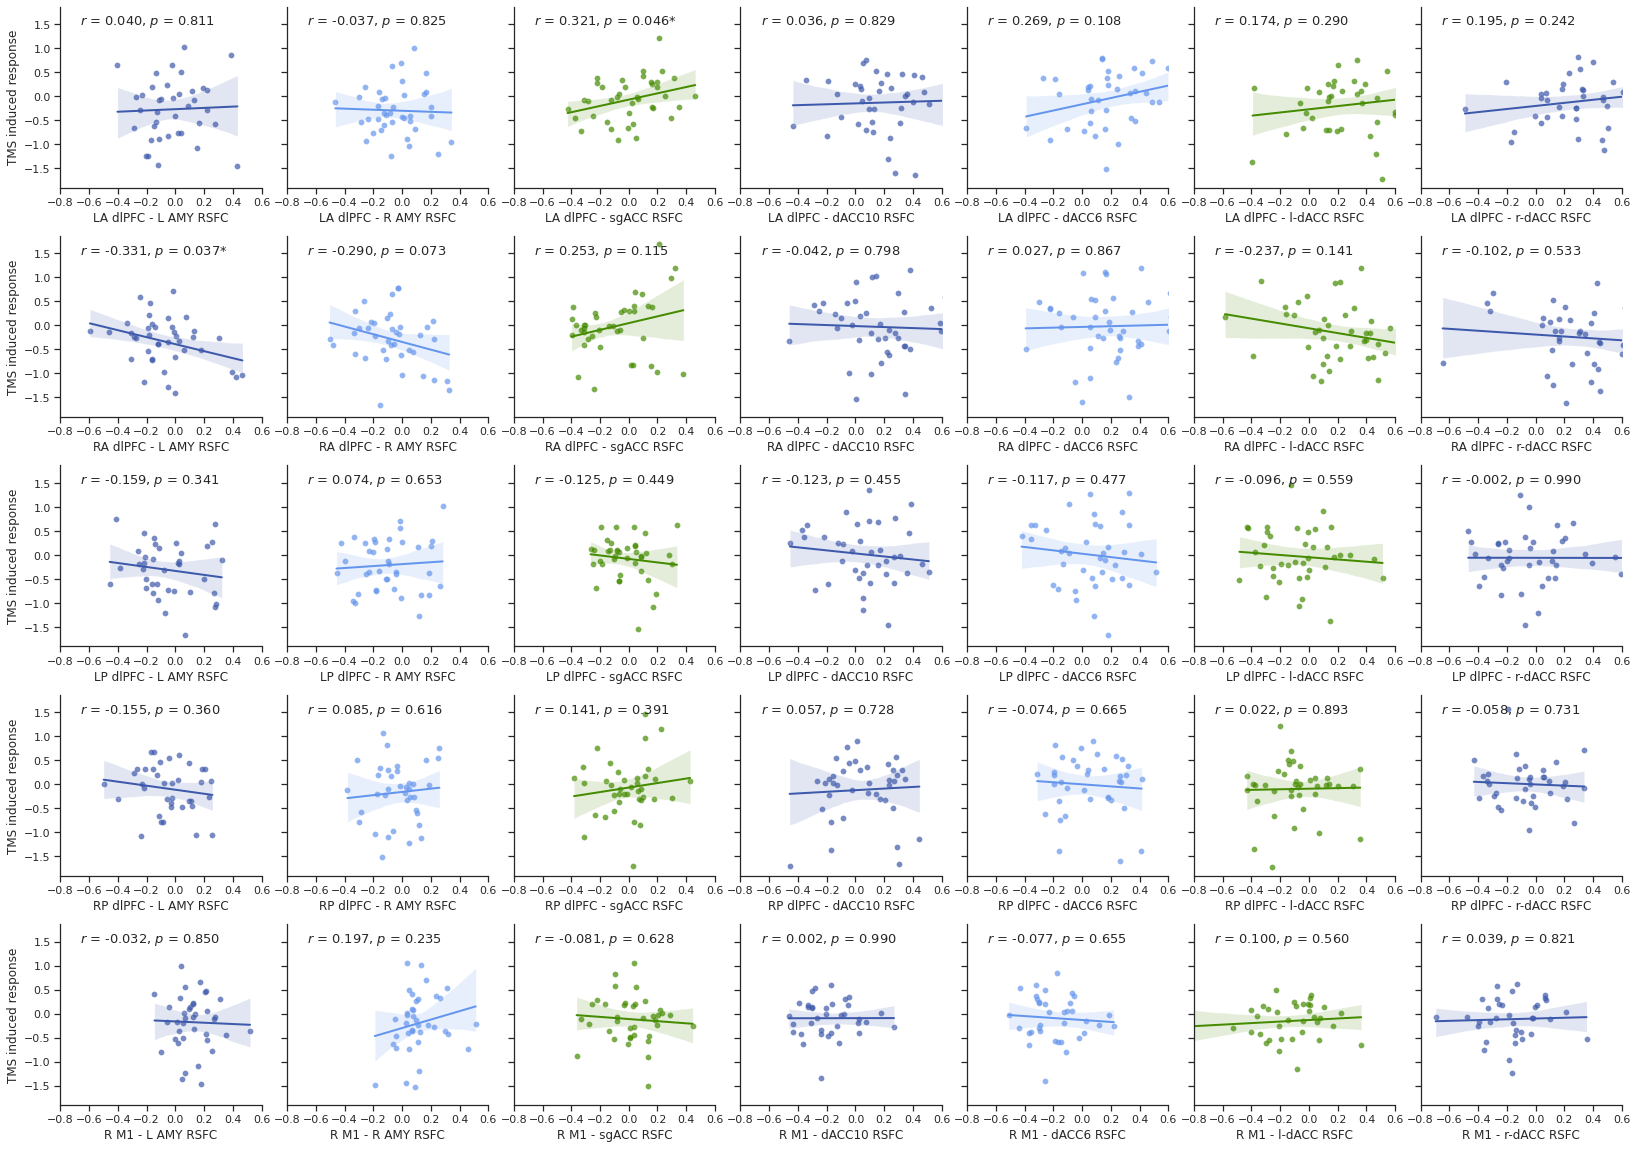

In [103]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']
fig = scatter_plot(plot_data_all, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - dACC10 RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - dACC6 RSFC', title = '')
    fig.axes[row, 5].set(xlabel = x_label_list[row] + ' - l-dACC RSFC', title = '')
    fig.axes[row, 6].set(xlabel = x_label_list[row] + ' - r-dACC RSFC', title = '')


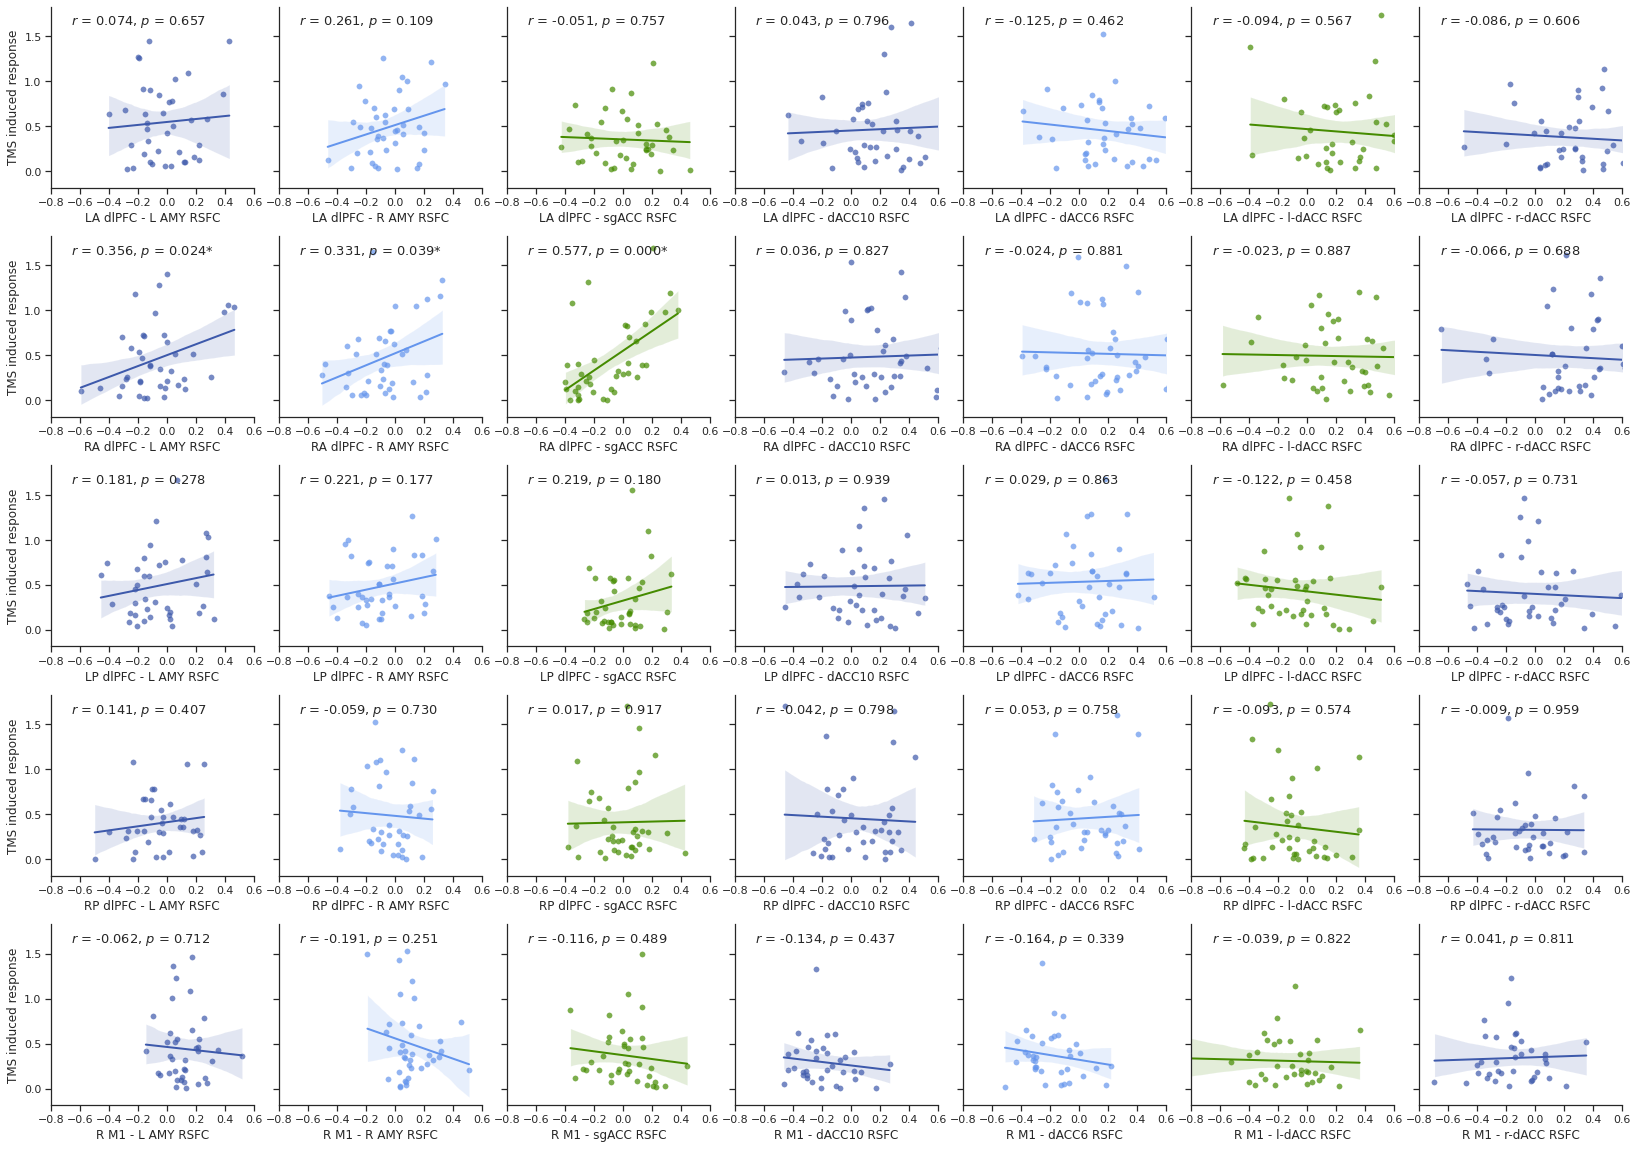

In [104]:
## show absolute connectivities:

# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_abs = plot_data_all.copy()
plot_data_all_abs['mean_response'] = abs(plot_data_all['mean_response'])
fig = scatter_plot(plot_data_all_abs, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - dACC10 RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - dACC6 RSFC', title = '')
    fig.axes[row, 5].set(xlabel = x_label_list[row] + ' - l-dACC RSFC', title = '')
    fig.axes[row, 6].set(xlabel = x_label_list[row] + ' - r-dACC RSFC', title = '')


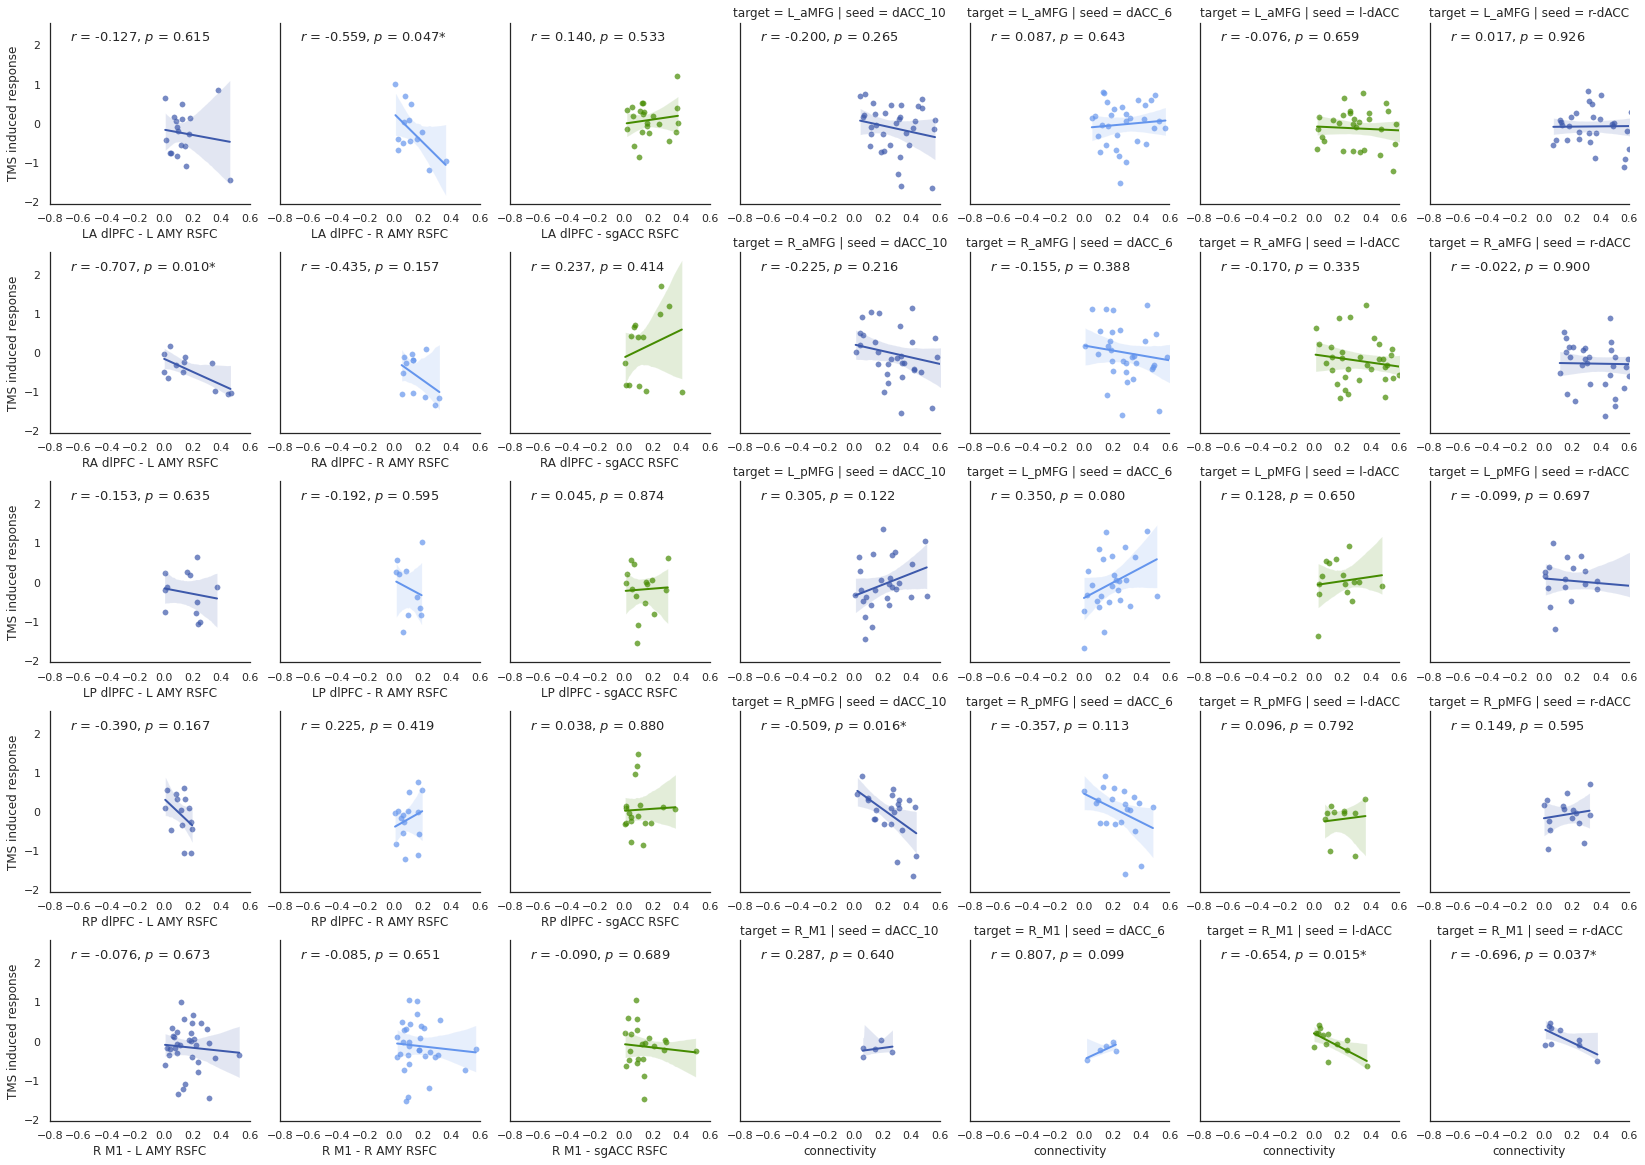

In [99]:
## show positive connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_pos = plot_data_all.loc[plot_data_all['connectivity'] >=0, :]
fig = scatter_plot(plot_data_all_pos, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [ ]:
## show negative connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_neg = plot_data_all.loc[plot_data_all['connectivity'] < 0, :]
fig = scatter_plot(plot_data_all_neg, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [ ]:
sns.set_style(style='white')

fig = scatter_plot(plot_data_all.loc[plot_data_all['target'] == 'L_aMFG',:], ['L_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_aMFG',:], ['R_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_pMFG',:], ['R_pMFG'])

fig.axes[0, 0].set(xlabel = 'RP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RP dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'L_pMFG',:], ['L_pMFG'])

fig.axes[0, 0].set(xlabel = 'LP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'LP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'LP dlPFC - sgACC RSFC', title = '')
